In [1]:
import numpy as np
from os import path
from skimage import io
from skimage.transform import rescale
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
import ipywidgets as widgets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
import A1.model, A2, B1, B2

Functions for loading data

In [3]:
LABELS = 'labels.csv'
DATASETS = 'Datasets'
IMGS = 'img'
TEST = '_test'

def load_data(folder, feature_col, file_col, load_image, augment=False):
    filenames, y = np.genfromtxt(
        path.join(DATASETS,folder,LABELS),
        usecols=(file_col,feature_col),
        dtype='U10,i8',
        unpack=True,
        skip_header=1,
        delimiter='\t'
    )
    imagedir = path.join(DATASETS,folder,IMGS)
    n = len(filenames)
    shape = load_image(path.join(imagedir,filenames[0])).shape # get first image to get shape
    X = np.empty((n*2 if augment else n, *shape)) # pre-define X, much more efficient than concatenating arrays
    for i in tqdm(range(n), desc=folder): # tqdm displays a nice loading bar
        X[i] = load_image(path.join(imagedir,filenames[i]))
        if augment:
            X[i+n] = X[i,:,::-1] # reverse image left to right
    print(f'Loaded {X.nbytes:,} bytes')
    if augment:
        y = np.tile(y,2)
    return X, y


Each task uses a different comibination of dataset, feature_col, file_col, and module:

In [4]:
TASKS = {'A1':('celeba',2,1,A1), 'A2':('celeba',3,1,A2), 'B1':('cartoon_set',2,3,B1),'B2':('cartoon_set',1,3,B2)}
task = widgets.Dropdown(options=TASKS, description='Task')
task

Dropdown(description='Task', options={'A1': ('celeba', 2, 1, <module 'A1' (namespace)>), 'A2': ('celeba', 3, 1…

In [5]:
dataset, feature_col, file_col, task_module = task.value
model = task_module.model

In [6]:
X, y = load_data(dataset, feature_col, file_col, model.load_image, augment=True)

celeba:   0%|          | 0/5000 [00:00<?, ?it/s]

Loaded 504,000,000 bytes


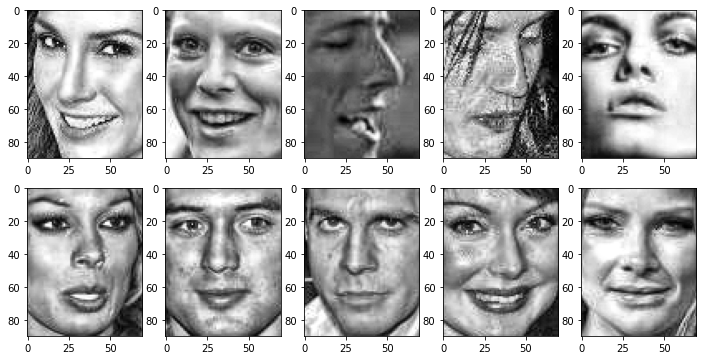

In [7]:
plt.figure(figsize=(12,6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X[i], cmap='gray')
plt.show()

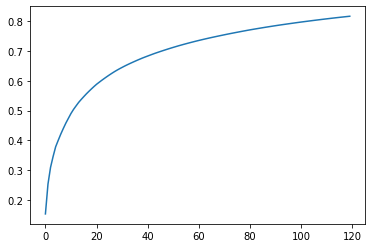

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 370
max_resources_: 10000
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 50
n_resources: 370
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END C=0.5, gamma=0.005, kernel=rbf;, score=(train=0.936, test=0.838) total time=   0.0s
[CV 2/5] END C=0.5, gamma=0.005, kernel=rbf;, score=(train=0.959, test=0.797) total time=   0.0s
[CV 3/5] END C=0.5, gamma=0.005, kernel=rbf;, score=(train=0.959, test=0.892) total time=   0.0s
[CV 4/5] END C=0.5, gamma=0.005, kernel=rbf;, score=(train=0.959, test=0.784) total time=   0.0s
[CV 5/5] END C=0.5, gamma=0.005, kernel=rbf;, score=(train=0.949, test=0.811) total time=   0.0s
[CV 1/5] END C=0.5, gamma=0.005, kernel=sigmoid;, score=(train=0.831, test=0.824) total time=   0.0s
[CV 2/5] END C=0.5, gamma=0.005, kernel=sigmoid;, score=(train=0.841, test=0.743) total time=   0.0s
[CV 3/5] END C=0.5, gamma=0.005, kernel=sigmoid;, 

[CV 4/5] END C=1, gamma=0.05, kernel=rbf;, score=(train=1.000, test=0.378) total time=   0.0s
[CV 5/5] END C=1, gamma=0.05, kernel=rbf;, score=(train=1.000, test=0.635) total time=   0.0s
[CV 1/5] END C=1, gamma=0.05, kernel=sigmoid;, score=(train=0.622, test=0.649) total time=   0.0s
[CV 2/5] END C=1, gamma=0.05, kernel=sigmoid;, score=(train=0.554, test=0.486) total time=   0.0s
[CV 3/5] END C=1, gamma=0.05, kernel=sigmoid;, score=(train=0.530, test=0.716) total time=   0.0s
[CV 4/5] END C=1, gamma=0.05, kernel=sigmoid;, score=(train=0.618, test=0.635) total time=   0.0s
[CV 5/5] END C=1, gamma=0.05, kernel=sigmoid;, score=(train=0.639, test=0.581) total time=   0.0s
[CV 1/5] END C=1, gamma=0.1, kernel=rbf;, score=(train=1.000, test=0.554) total time=   0.0s
[CV 2/5] END C=1, gamma=0.1, kernel=rbf;, score=(train=1.000, test=0.473) total time=   0.0s
[CV 3/5] END C=1, gamma=0.1, kernel=rbf;, score=(train=1.000, test=0.554) total time=   0.0s
[CV 4/5] END C=1, gamma=0.1, kernel=rbf;, s

[CV 1/5] END C=5, gamma=0.02, kernel=rbf;, score=(train=1.000, test=0.865) total time=   0.0s
[CV 2/5] END C=5, gamma=0.02, kernel=rbf;, score=(train=1.000, test=0.716) total time=   0.0s
[CV 3/5] END C=5, gamma=0.02, kernel=rbf;, score=(train=1.000, test=0.797) total time=   0.0s
[CV 4/5] END C=5, gamma=0.02, kernel=rbf;, score=(train=1.000, test=0.676) total time=   0.0s
[CV 5/5] END C=5, gamma=0.02, kernel=rbf;, score=(train=1.000, test=0.811) total time=   0.0s
[CV 1/5] END C=5, gamma=0.02, kernel=sigmoid;, score=(train=0.625, test=0.649) total time=   0.0s
[CV 2/5] END C=5, gamma=0.02, kernel=sigmoid;, score=(train=0.588, test=0.500) total time=   0.0s
[CV 3/5] END C=5, gamma=0.02, kernel=sigmoid;, score=(train=0.598, test=0.716) total time=   0.0s
[CV 4/5] END C=5, gamma=0.02, kernel=sigmoid;, score=(train=0.669, test=0.635) total time=   0.0s
[CV 5/5] END C=5, gamma=0.02, kernel=sigmoid;, score=(train=0.662, test=0.622) total time=   0.0s
[CV 1/5] END C=5, gamma=0.05, kernel=rbf

[CV 2/5] END C=1, gamma=0.005, kernel=sigmoid;, score=(train=0.782, test=0.752) total time=   0.0s
[CV 3/5] END C=1, gamma=0.005, kernel=sigmoid;, score=(train=0.777, test=0.752) total time=   0.0s
[CV 4/5] END C=1, gamma=0.005, kernel=sigmoid;, score=(train=0.780, test=0.784) total time=   0.0s
[CV 5/5] END C=1, gamma=0.005, kernel=sigmoid;, score=(train=0.773, test=0.739) total time=   0.0s
[CV 1/5] END C=10, gamma=0.02, kernel=rbf;, score=(train=1.000, test=0.829) total time=   0.1s
[CV 2/5] END C=10, gamma=0.02, kernel=rbf;, score=(train=1.000, test=0.779) total time=   0.1s
[CV 3/5] END C=10, gamma=0.02, kernel=rbf;, score=(train=1.000, test=0.838) total time=   0.1s
[CV 4/5] END C=10, gamma=0.02, kernel=rbf;, score=(train=1.000, test=0.874) total time=   0.1s
[CV 5/5] END C=10, gamma=0.02, kernel=rbf;, score=(train=1.000, test=0.856) total time=   0.1s
[CV 1/5] END C=2, gamma=0.02, kernel=rbf;, score=(train=1.000, test=0.829) total time=   0.1s
[CV 2/5] END C=2, gamma=0.02, kerne

[CV 2/5] END C=5, gamma=0.01, kernel=rbf;, score=(train=1.000, test=0.905) total time=   0.9s
[CV 3/5] END C=5, gamma=0.01, kernel=rbf;, score=(train=1.000, test=0.917) total time=   1.1s
[CV 4/5] END C=5, gamma=0.01, kernel=rbf;, score=(train=1.000, test=0.905) total time=   1.0s
[CV 5/5] END C=5, gamma=0.01, kernel=rbf;, score=(train=1.000, test=0.904) total time=   0.9s
[CV 1/5] END C=10, gamma=0.01, kernel=rbf;, score=(train=1.000, test=0.923) total time=   1.0s
[CV 2/5] END C=10, gamma=0.01, kernel=rbf;, score=(train=1.000, test=0.905) total time=   0.9s
[CV 3/5] END C=10, gamma=0.01, kernel=rbf;, score=(train=1.000, test=0.917) total time=   1.0s
[CV 4/5] END C=10, gamma=0.01, kernel=rbf;, score=(train=1.000, test=0.905) total time=   1.1s
[CV 5/5] END C=10, gamma=0.01, kernel=rbf;, score=(train=1.000, test=0.904) total time=   0.9s
[CV 1/5] END C=2, gamma=0.005, kernel=rbf;, score=(train=0.995, test=0.929) total time=   0.6s
[CV 2/5] END C=2, gamma=0.005, kernel=rbf;, score=(tra

In [8]:
print("Mean cross-validated accuracy:", model.fit(X, y))

In [9]:
X_test, y_test = load_data(dataset+TEST, feature_col, file_col, model.load_image)

celeba_test:   0%|          | 0/1000 [00:00<?, ?it/s]

Loaded 50,400,000 bytes


In [10]:
y_pred = model.predict(X_test)

In [11]:
print("Accuracy on test data:", accuracy_score(y_test,y_pred))

Accuracy on test data: 0.945
